In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Info

In [9]:
df1 = pd.read_csv("../data/wikidata_artists_part1.csv")
df2= pd.read_csv("../data/wikidata_artists_part2.csv")

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,artist,country,award,death,gender
0,13,NaN,álbum,NaN,Unknown
1,13,NaN,album de diamant du SNEP,NaN,Unknown
2,13,NaN,תואר יהלום מ-SNEP,NaN,Unknown
3,13,NaN,diamantalbum enligt SNEP,NaN,Unknown
4,13,NaN,diamantni album SNEP,NaN,Unknown


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370330 entries, 0 to 370329
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   artist   370330 non-null  object
 1   country  332370 non-null  object
 2   award    370330 non-null  object
 3   death    140390 non-null  object
 4   gender   370330 non-null  object
dtypes: object(5)
memory usage: 14.1+ MB


In [11]:
df.isnull().sum()

artist          0
country     37960
award           0
death      229940
gender          0
dtype: int64

In [12]:
df['country'].value_counts()

country
United States     108615
United Kingdom     38311
Soviet Union       20543
France             15463
Russia             14703
                   ...  
Georgia                9
Haiti                  9
Ivory Coast            5
Ethiopia               4
Croatia                3
Name: count, Length: 139, dtype: int64

## Nulos

In [13]:
df['country'] = df['country'].fillna('Unknown')

In [14]:
df['death'] = df['death'].notna()  # Convierte valores no nulos en True y los nulos en False
df['death'].value_counts()

death
False    229940
True     140390
Name: count, dtype: int64

In [15]:
df['death'] = df['death'].map({False: 'alive', True: 'deceased'})
df['death'].value_counts()

death
alive       229940
deceased    140390
Name: count, dtype: int64

In [16]:
df.isnull().sum()

artist     0
country    0
award      0
death      0
gender     0
dtype: int64

In [17]:
df.head()

,artist,country,award,death,gender
0,13,Unknown,álbum,alive,Unknown
1,13,Unknown,album de diamant du SNEP,alive,Unknown
2,13,Unknown,תואר יהלום מ-SNEP,alive,Unknown
3,13,Unknown,diamantalbum enligt SNEP,alive,Unknown
4,13,Unknown,diamantni album SNEP,alive,Unknown


## Duplicados

In [18]:
duplicados = df.duplicated()

print(df[duplicados])

              artist        country                              award  death  \
7                 19        Unknown                         Kloteplaat  alive   
16          2 Chainz  United States   BET Award for Best Collaboration  alive   
24             2Baba        Nigeria            MTV Europe Music Awards  alive   
25             2Baba        Nigeria            MTV Europe Music Awards  alive   
26             2Baba        Nigeria            MTV Europe Music Awards  alive   
...              ...            ...                                ...    ...   
370317  Étienne Daho         France  Comendador das Artes e das Letras  alive   
370321  Étienne Daho         France           Victoire de l'album rock  alive   
370324  Étienne Daho         France                 Victoire d'honneur  alive   
370325  Étienne Daho         France                 Victoire d'honneur  alive   
370328    Åsa Jinder         Sweden                Zornmärket i silver  alive   

         gender  
7       U

In [19]:
df = df.drop_duplicates()

In [20]:
duplicados = df.duplicated()

print(df[duplicados])

Empty DataFrame
Columns: [artist, country, award, death, gender]
Index: []


In [21]:
df.shape

(286024, 5)

In [22]:
repeaated_name = df.value_counts(subset=['artist']).reset_index(name='counts')

# Filtrar solo las combinaciones que aparecen más de una vez
repeated = repeaated_name[repeaated_name['counts'] > 1]

# Mostrar resultados
print("=== Artistas duplicados por 'artists' ===")
print(f"Número de combinaciones duplicadas: {len(repeated)}")
repeated.head(20)

=== Artistas duplicados por 'artists' ===
Número de combinaciones duplicadas: 3110


,artist,counts
0,Mstislav Rostropovich,3332
1,Daniel Barenboim,3303
2,Valery Gergiev,2940
3,Zubin Mehta,2892
4,Dmitri Shostakovich,2620
5,Lyudmila Zykina,2016
6,Galina Vishnevskaya,1878
7,Vladimir Fedoseyev,1810
8,Ivan Petrov,1805
9,Angela Lansbury,1764


## Idioma

In [23]:
import pandas as pd
from langdetect import detect
from tqdm import tqdm

# Frases o palabras comunes en otros idiomas
palabras_no_ingles = [
    "stär um", "para", "prêmio", "premio", "prix", "voor", "de", "sus", "la", "das", "del", "der", "des",
    "el", "le", "pe", "stella", "sulla", "nagroda", "carriera", "réalta", "premi", "xelata",
    "tähti", "æresdoktor", "famen", "doktor", "oriel", "anfarwolion", "auf dem", "or merit", "kpakpando", "stäär üüb"
    
]

# Caché para langdetect
award_lang_cache = {}

def is_english_filtered(text):
    text_l = str(text).lower().strip()
    
    if text not in award_lang_cache:
        try:
            award_lang_cache[text] = detect(text)
        except:
            award_lang_cache[text] = "unknown"
    
    if award_lang_cache[text] != "en":
        return False

    for palabra in palabras_no_ingles:
        if palabra in text_l:
            return False

    return True

# Aplicar el filtro sobre la columna 'award'
tqdm.pandas(desc="🔍 Filtrando premios válidos")
df = df[df['award'].notna() & df['award'].progress_apply(is_english_filtered)]

df.head()


🔍 Filtrando premios válidos: 100%|██████████| 286024/286024 [03:01<00:00, 1577.44it/s]


,artist,country,award,death,gender
75,1995,Unknown,Victory of the album of urban musics,alive,Unknown
91,50 Cent,United States,Billboard Music Awards,alive,male
92,50 Cent,United States,Billboard Music Award,alive,male
136,50 Cent,United States,star on Hollywood Walk of Fame,alive,male
163,5 Seconds of Summer,Unknown,American Music Award for New Artist of the Year,alive,Unknown


In [24]:
df.shape

(7624, 5)

### Agrupar premios y creacion de nuevas columnas

In [26]:

# Función para obtener el valor más común en cada grupo
def valor_mas_comun(serie):
    return serie.mode().iloc[0] if not serie.mode().empty else serie.dropna().iloc[0]

# Agrupar por artista consolidando la información
agrupado = df.groupby("artist").agg({
    "country": valor_mas_comun,
    "death": valor_mas_comun,
    "gender": valor_mas_comun,
    "award": lambda x: sorted(set(x))
}).reset_index()

# Crear columna: número de premios
agrupado["award_count"] = agrupado["award"].apply(len)

# Crear columna: si ganó un Grammy (busca "grammy" en los premios)
agrupado["won_grammy"] = agrupado["award"].apply(
    lambda premios: any("grammy" in premio.lower() for premio in premios)
)

# Convertir lista de premios en string separado por punto y coma
agrupado["award"] = agrupado["award"].apply(lambda x: "; ".join(x))

# Asignar al DataFrame final
df = agrupado

# Mostrar resultado
print(df.head())



                 artist        country  death   gender  \
0                  1995        Unknown  alive  Unknown   
1   5 Seconds of Summer        Unknown  alive  Unknown   
2               50 Cent  United States  alive     male   
3  A Tribe Called Quest        Unknown  alive  Unknown   
4                  ABBA        Unknown  alive  Unknown   

                                               award  award_count  won_grammy  
0               Victory of the album of urban musics            1       False  
1  American Music Award for New Artist of the Yea...            2       False  
2  Billboard Music Award; Billboard Music Awards;...            3       False  
3  BRIT Awards/International Group; Brit Award fo...            4       False  
4  First prize of the Eurovision Song Contest; Ro...            4       False  


In [27]:
df.shape

(1947, 7)

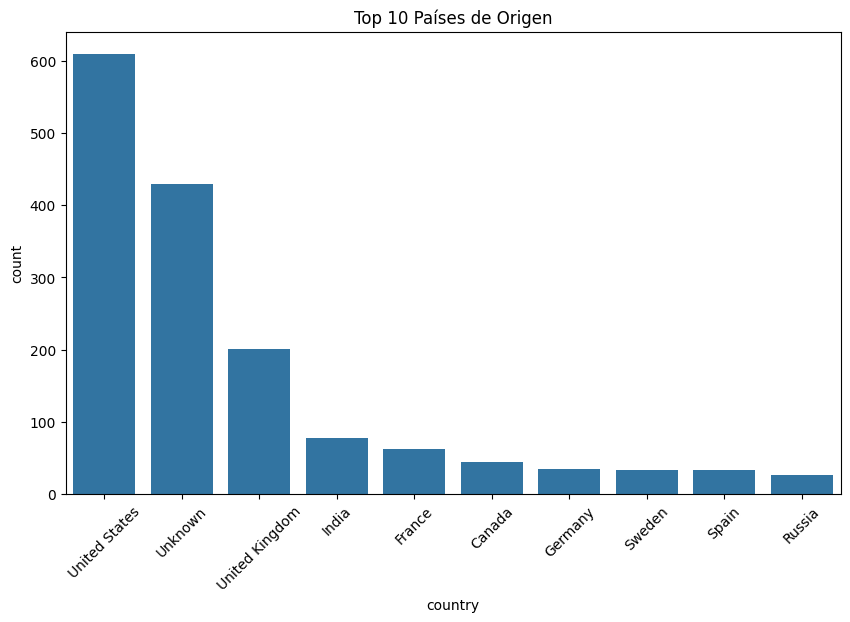

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:10])
plt.title('Top 10 Países de Origen')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Top 20 artistas con más premios'}, ylabel='artist'>

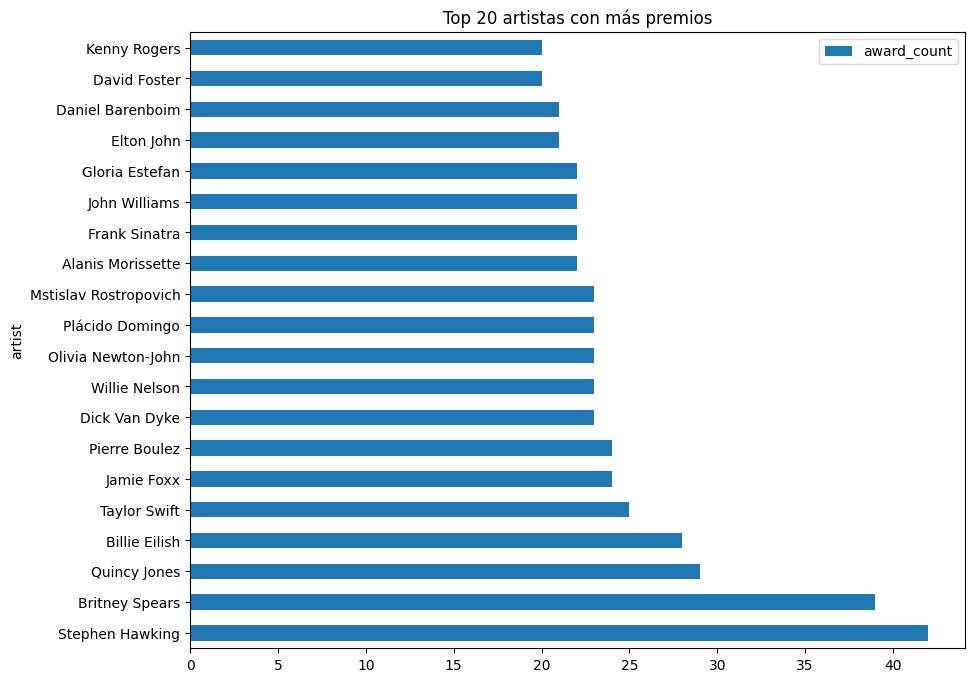

In [29]:
df.sort_values("award_count", ascending=False).head(20).plot.barh(
    x="artist", y="award_count", figsize=(10, 8), title="Top 20 artistas con más premios")


<Axes: title={'center': 'Distribución de premios por artista'}, ylabel='Frequency'>

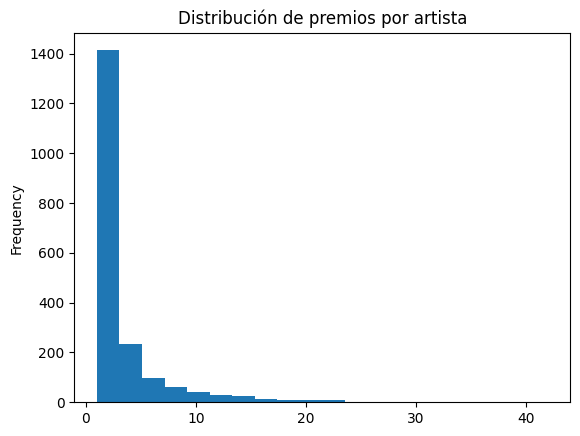

In [30]:
df["award_count"].plot.hist(bins=20, title="Distribución de premios por artista")


<Axes: title={'center': 'Distribución de artistas según premios Grammy'}, ylabel='count'>

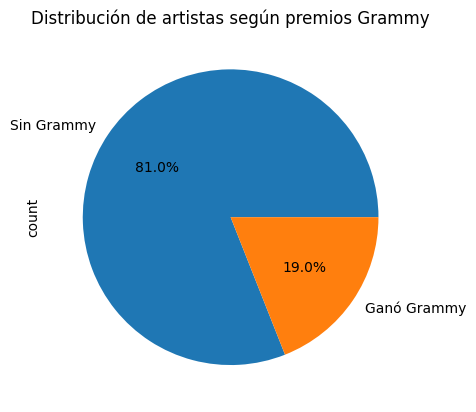

In [31]:
df["won_grammy"].value_counts().plot.pie(autopct='%1.1f%%', labels=["Sin Grammy", "Ganó Grammy"], title="Distribución de artistas según premios Grammy")


<Axes: title={'center': 'Top 10 países con más artistas'}, xlabel='country'>

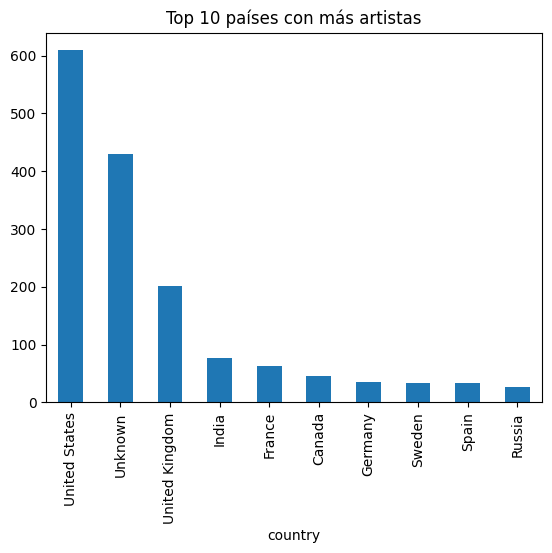

In [32]:
df["country"].value_counts().head(10).plot.bar(title="Top 10 países con más artistas")


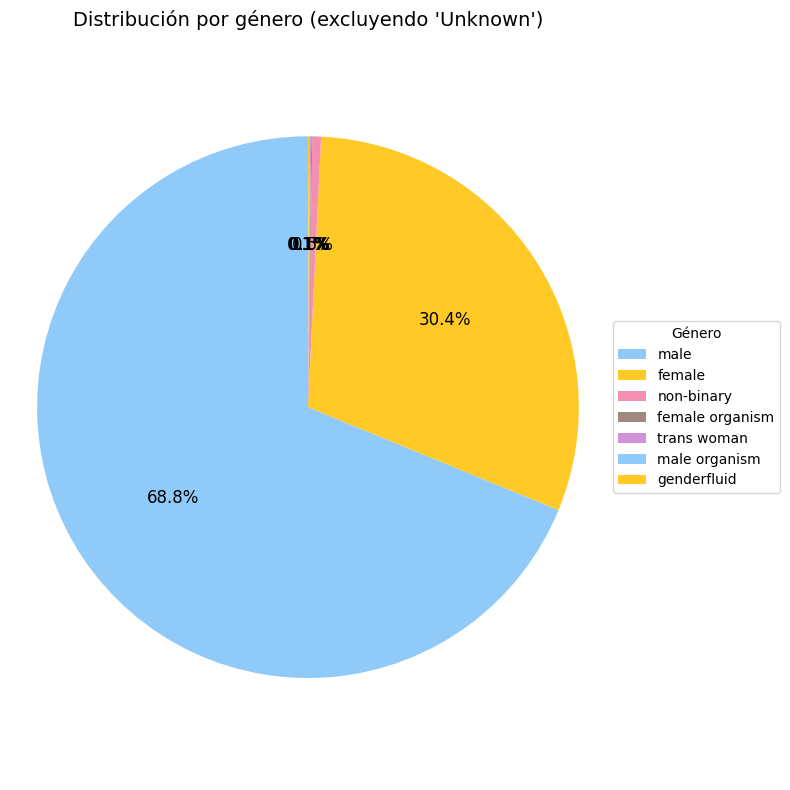

In [33]:
# Excluir "Unknown"
gender_counts = df[df["gender"] != "Unknown"]["gender"].value_counts()

# Colores personalizados (opcional)
colors = ["#90caf9", "#ffca28", "#f48fb1", "#a1887f", "#ce93d8"]

# Crear figura
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=None,  # Las quitamos del gráfico
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title("Distribución por género (excluyendo 'Unknown')", fontsize=14)
plt.axis("equal")

# Añadir leyenda al costado
plt.legend(
    labels=gender_counts.index,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title="Género"
)

plt.tight_layout()
plt.show()

